<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/PyTorch/Neural_Network_Classification_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Classification with PyTorch

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np

### Make classification data

In [2]:
from sklearn.datasets import make_circles

In [3]:
n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.05,random_state=42)

In [4]:
X[:5]

array([[ 0.74220688,  0.24668576],
       [-0.7340323 ,  0.16869164],
       [-0.82985872,  0.22195899],
       [-0.42913559,  0.67223019],
       [ 0.44560223, -0.89493556]])

In [5]:
y[:5]

array([1, 1, 1, 1, 0])

In [6]:
circles = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'label':y})

In [7]:
import matplotlib.pyplot as plt

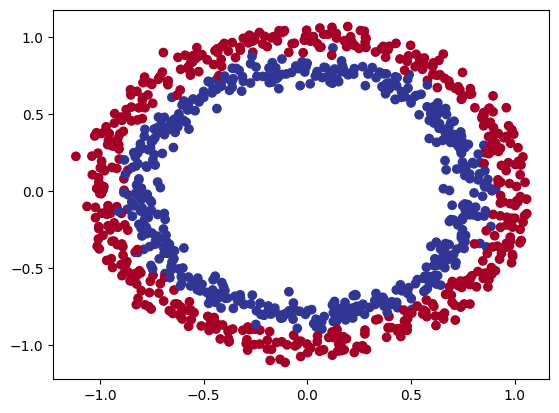

In [8]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [9]:
X.shape,y.shape

((1000, 2), (1000,))

In [10]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [12]:
X_train.dtype,y_train.dtype

(torch.float32, torch.float32)

In [13]:
X_train.shape

torch.Size([800, 2])

### Building a Model

In [14]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_1 = nn.Linear(in_features = 2,out_features = 5)
    self.linear_layer_2 = nn.Linear(in_features = 5,out_features = 1)

  def forward(self,x):
    return self.linear_layer_2(self.linear_layer_1(x))

In [15]:
model_0 = CircleModelV0()

In [16]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)

In [17]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3002, -0.3539],
                      [-0.0207, -0.5545],
                      [-0.5016, -0.5375],
                      [ 0.2711, -0.6887],
                      [-0.6768,  0.3891]])),
             ('0.bias', tensor([ 0.5239, -0.4872, -0.0893, -0.3259,  0.3958])),
             ('1.weight',
              tensor([[-0.3469,  0.3178, -0.1156, -0.3456,  0.0868]])),
             ('1.bias', tensor([0.0420]))])

In [19]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.01)

In [20]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### Training and Testing Loop

In [23]:
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  #Calculate Loss/Accuracy
  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_train,y_preds)

  # Optimizer zero grad
  optimizer.zero_grad()

  #Loss Backward
  loss.backward()
  # Optmizer Step
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(test_pred,y_test)

  if epoch%10 == 0:
    print(f"Epoch: {epoch}|Loss:{loss: .5f}|Acc: {accuracy:.2f}|Test Loss:{test_loss:.5f}| Test acc: {test_acc:.2f}")

Epoch: 0|Loss: 0.69228|Acc: 53.62|Test Loss:0.70131| Test acc: 44.00
Epoch: 10|Loss: 0.69228|Acc: 53.62|Test Loss:0.70131| Test acc: 44.00
Epoch: 20|Loss: 0.69228|Acc: 53.62|Test Loss:0.70131| Test acc: 44.00
Epoch: 30|Loss: 0.69228|Acc: 53.62|Test Loss:0.70131| Test acc: 44.00
Epoch: 40|Loss: 0.69228|Acc: 53.62|Test Loss:0.70131| Test acc: 44.00
Epoch: 50|Loss: 0.69228|Acc: 53.62|Test Loss:0.70131| Test acc: 44.00
Epoch: 60|Loss: 0.69228|Acc: 53.62|Test Loss:0.70131| Test acc: 44.00
Epoch: 70|Loss: 0.69228|Acc: 53.62|Test Loss:0.70131| Test acc: 44.00
Epoch: 80|Loss: 0.69228|Acc: 53.62|Test Loss:0.70131| Test acc: 44.00
Epoch: 90|Loss: 0.69228|Acc: 53.62|Test Loss:0.70131| Test acc: 44.00


### Importing helper functions

In [32]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

--2023-08-17 10:11:59--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2023-08-17 10:11:59 (95.3 MB/s) - ‘helper_functions.py’ saved [10160/10160]



### Plot Decision Boundary

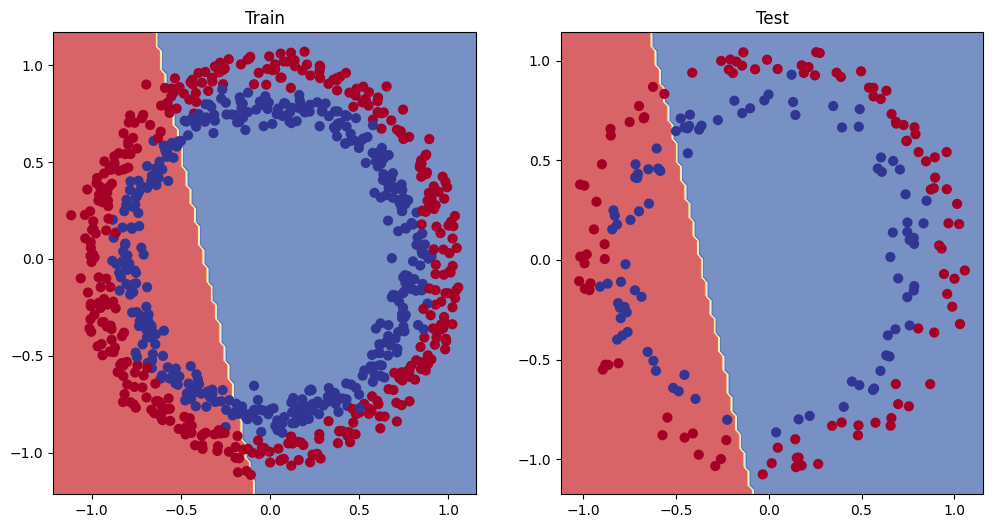

In [33]:
from helper_functions import plot_predictions,plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0,X_test,y_test)

### Improving Model

In [62]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2,out_features = 128),
    nn.Linear(in_features = 128,out_features = 256),
    nn.ReLU(),
    nn.Linear(in_features = 256,out_features = 512),
    nn.ReLU(),
    nn.Linear(in_features = 512,out_features = 1),
)

In [63]:
model_1

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=1, bias=True)
)

In [64]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_1.parameters(),lr = 0.1)

In [65]:
X_train.dtype,y_train.dtype

(torch.float32, torch.float32)

In [66]:
model_1

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=1, bias=True)
)

In [67]:
torch.manual_seed(42)
epochs = 1000
for epoch  in range(1,epochs+1):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_train,y_preds)

  optimizer.zero_grad()

  #Loss Backward
  loss.backward()
  # Optmizer Step
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(test_pred,y_test)

  if epoch%10 == 0:
    print(f"Epoch: {epoch}|Loss:{loss: .5f}|Acc: {accuracy:.2f}|Test Loss:{test_loss:.5f}| Test acc: {test_acc:.2f}")

Epoch: 10|Loss: 40.84042|Acc: 50.00|Test Loss:1.56170| Test acc: 52.50
Epoch: 20|Loss: 0.69906|Acc: 50.62|Test Loss:0.67232| Test acc: 51.00
Epoch: 30|Loss: 0.54993|Acc: 65.12|Test Loss:0.49137| Test acc: 65.00
Epoch: 40|Loss: 0.46017|Acc: 70.75|Test Loss:0.45784| Test acc: 68.50
Epoch: 50|Loss: 1.36028|Acc: 61.25|Test Loss:1.14310| Test acc: 64.00
Epoch: 60|Loss: 0.65825|Acc: 58.13|Test Loss:0.61490| Test acc: 57.00
Epoch: 70|Loss: 0.56844|Acc: 63.75|Test Loss:0.57442| Test acc: 59.00
Epoch: 80|Loss: 0.49194|Acc: 68.88|Test Loss:0.46623| Test acc: 66.00
Epoch: 90|Loss: 0.43280|Acc: 72.50|Test Loss:0.55167| Test acc: 67.00
Epoch: 100|Loss: 0.43897|Acc: 71.62|Test Loss:0.44092| Test acc: 69.50
Epoch: 110|Loss: 0.38548|Acc: 75.12|Test Loss:0.39187| Test acc: 73.00
Epoch: 120|Loss: 0.32996|Acc: 83.88|Test Loss:0.30795| Test acc: 88.00
Epoch: 130|Loss: 0.36506|Acc: 78.38|Test Loss:0.35920| Test acc: 84.00
Epoch: 140|Loss: 0.32084|Acc: 79.88|Test Loss:0.35898| Test acc: 77.50
Epoch: 150|Los